# Star forming

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import illustris_python as il

In [2]:
def plot_max_points(ax, data, weights, color, label):
    """
    grafica un punto por cada barra en la posicion del centro del bin y la altura correspondiente,
    y une los puntos con lineas rectas.
    """
    hist, bin_edges = np.histogram(data, bins=n_bins, weights=weights)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # centros de los bins
    ax.plot(bin_centers, hist, color=color, label=label, marker='o', linestyle='-')  # une puntos con lineas

In [3]:
basePath = '/home/tnguser/sims.TNG/TNG100-1/output'
fields = ['Group_R_Crit200', 'GroupSFR', 'GroupMassType']
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

In [4]:
fields = ['SubhaloMass','SubhaloSFRinRad','SubhaloSFR' ,'SubhaloStellarPhotometrics', 'SubhaloMassType', 'SubhaloGrNr']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)

In [5]:
h = 0.6774

In [6]:
df = pd.read_pickle('../generate_catalog/group_number_cat.pkl')

In [7]:
F3r200 = df['3FossilR200']
NF3r200 = df['3NFossilR200']

In [8]:
halos['GroupMassType'][F3r200,4]

array([293.62885 , 251.3057  , 135.02693 , 154.06927 , 146.72746 ,
       151.75215 ,  82.80259 ,  84.619576, 106.64192 , 123.35533 ,
        89.85959 ,  98.86231 ,  66.67466 ,  79.763535,  58.423813,
        58.685287,  74.64714 ,  71.00924 ,  60.680134,  57.730545,
        53.6938  ,  40.57365 ,  40.309994,  41.475574,  40.40372 ,
        49.993397,  35.80867 ,  44.629482,  38.90708 ,  34.268517,
        36.158276,  40.692078,  36.349606,  31.167645,  32.7648  ,
        30.269083,  27.995567,  37.61858 ,  31.95811 ,  32.631577,
        29.720211,  26.483063,  23.841873,  32.750183,  31.765549,
        21.45194 ,  19.377907,  27.040106,  22.801876,  14.486268,
        13.924839,  17.044561,  19.063362,  20.045925,  15.844781],
      dtype=float32)

In [11]:
sstarforming = []
Nsstarforming = []
stellarmass = []
Nstellarmass = []

for i in (range(len(F3r200))):
    a = (halos['GroupSFR'][F3r200[i]]/(halos['GroupMassType'][F3r200[i],4]))*h/(10**10)
    sstarforming.append(a)

for i in (range(len(NF3r200))):
    b = (halos['GroupSFR'][NF3r200[i]]/((halos['GroupMassType'][NF3r200[i],4])))*h/(10**10)
    Nsstarforming.append(b)


In [12]:
sstarforming = np.log10(sstarforming)
Nsstarforming = np.log10(Nsstarforming)

In [13]:
mediansSFR = np.median(sstarforming)
nmedianNsSFR = np.median(Nsstarforming)

In [14]:
print(f'fossil: {mediansSFR} \nno fossil:{nmedianNsSFR}')

fossil: -11.016084058169792 
no fossil:-10.783737871882481


In [15]:
weight_fossil = np.ones_like(sstarforming)/float(len(F3r200))
weight_nonfossil = np.ones_like(Nsstarforming)/float(len(NF3r200))
bins = np.arange(0,1,0.05)

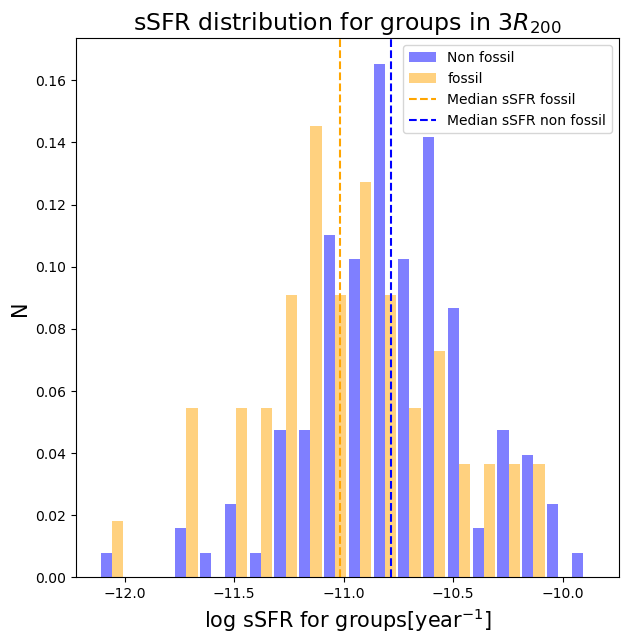

In [16]:
plt.figure(figsize=(7,7))
plt.title('sSFR distribution for groups in $3R_{200}$', fontsize=17)

plt.ylabel('N', fontsize=15)
plt.xlabel('log sSFR for groups[year$^{-1}$]',fontsize=15)
plt.hist([Nsstarforming, sstarforming], bins=20, color = ['blue', 'orange'], rwidth=0.9, alpha=0.5, label=['Non fossil', 'fossil'], weights = [weight_nonfossil, weight_fossil])

#plt.hist(Nfracblue, bins=bins, color = 'blue', rwidth=0.9, alpha=0.5, label='Non fossil', density=True, stacked=True)
#plt.hist(fracblue, bins=bins, color = 'orange', rwidth=0.9, alpha=0.5, label='Fossil', density=True, stacked=True)
plt.axvline(mediansSFR, color='orange', linestyle = '--', label='Median sSFR fossil')
plt.axvline(nmedianNsSFR, color='blue', linestyle = '--', label='Median sSFR non fossil')
plt.legend(loc='upper right', fontsize=10)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('/home/tnguser/taller/graficosnuevos/ssfr3R200.jpg')

In [17]:
init1 = min(Nsstarforming)
maxim1 = max(Nsstarforming)
init2 = min(sstarforming)
maxim2 = max(sstarforming)

In [18]:
bins1_sfr3 = np.linspace(init2, maxim1, num=len(Nsstarforming))
bins2_sfr3 = np.linspace(init2, maxim1,num=len(sstarforming))

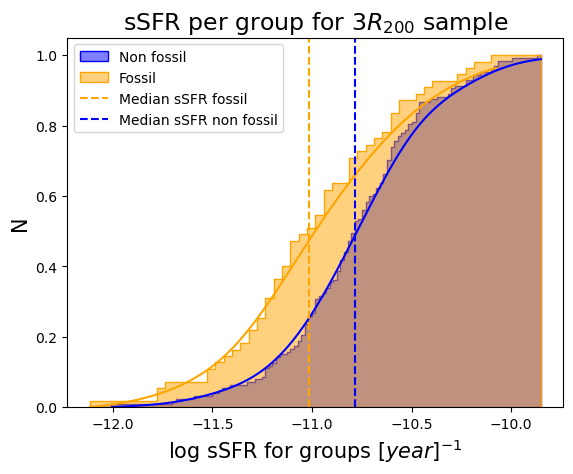

In [19]:
sns.histplot(Nsstarforming, kde=True, label='Non fossil', color='blue', element='step', cumulative=True, bins=bins1_sfr3, stat='density')
sns.histplot(sstarforming, kde=True, label='Fossil', color='orange', element='step', cumulative=True, bins=bins2_sfr3, stat='density')


plt.title('sSFR per group for $3R_{200}$ sample', fontsize=17)
plt.ylabel('N', fontsize=15)
plt.xlabel('log sSFR for groups $[year]^{-1}$', fontsize=15)

plt.axvline(mediansSFR, color='orange', linestyle = '--', label='Median sSFR fossil')
plt.axvline(nmedianNsSFR, color='blue', linestyle = '--', label='Median sSFR non fossil')

plt.legend(loc='upper left', fontsize=10)


plt.savefig('/home/tnguser/taller/graficosnuevos/ssfr3R200_KDE.jpg', dpi=150)

plt.show()

In [20]:
from scipy.stats import kstest
from scipy.stats import ks_2samp

In [21]:
print(ks_2samp(sstarforming, Nsstarforming))
print(ks_2samp(sstarforming, Nsstarforming, alternative='less'))

KstestResult(statistic=0.3073729420186113, pvalue=0.0010184054212732407, statistic_location=-11.081753119089734, statistic_sign=1)
KstestResult(statistic=0.0, pvalue=1.0, statistic_location=-9.851325819887759, statistic_sign=-1)


In [23]:
stellar_mass = np.log10((subhalos['SubhaloMassType'][:,4])/h) +10
gals = np.nonzero(stellar_mass > 9.5)[0]

/tmp/ipykernel_1694/3601298107.py:1: RuntimeWarning: divide by zero encountered in log10
  stellar_mass = np.log10((subhalos['SubhaloMassType'][:,4])/h) +10


In [24]:
sstarforming_each = []
Nsstarforming_each = []

for i in range(len(F3r200)):
    sstarforming_each.append([])
for i in range(len(NF3r200)):
    Nsstarforming_each.append([])

for i in range(len(F3r200)):
    group = np.nonzero(subhalos['SubhaloGrNr'][gals] == F3r200[i])[0] #aqui con el gals se ahce uso solo de las galaxias con al menos 1000 particulas
    #print(group)
    for subhalo in range(len(group)):
        a = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
        sstarforming_each[i].append(a)

for i in range(len(NF3r200)):
    group = np.nonzero(subhalos['SubhaloGrNr'][gals] == NF3r200[i])[0] #aqui con el gals se ahce uso solo de las galaxias con al menos 1000 particulas
    #print(group)
    for subhalo in range(len(group)):
        b = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
        Nsstarforming_each[i].append(b)

/tmp/ipykernel_1694/1400331331.py:13: RuntimeWarning: invalid value encountered in scalar divide
  a = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
/tmp/ipykernel_1694/1400331331.py:20: RuntimeWarning: invalid value encountered in scalar divide
  b = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])


In [25]:
sstarforming_each[21]

[nan, nan, 0.0, 0.0, 0.0, nan, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0]

In [26]:
QF_f=[]
QF_nf=[]
for i in range(len(F3r200)):
    a = np.where(np.array(sstarforming_each[i]) == 0)[0]
    QF_f.append(len(a)/len(sstarforming_each[i]))

for i in range(len(NF3r200)):
    a = np.where(np.array(Nsstarforming_each[i]) == 0)[0]
    QF_nf.append(len(a)/len(Nsstarforming_each[i]))
#nonfossil['Nsstarforming_each']

In [27]:
medianQF = np.median(QF_f)
mediannQF = np.median(QF_nf)

meanQF = np.mean(QF_f)
meannQF = np.mean(QF_nf)

In [28]:
print(f'la mediana de QF es: \n fossil : {medianQF}\n no fossil : {mediannQF}')

la mediana de QF es: 
 fossil : 0.5263157894736842
 no fossil : 0.5


In [29]:
weight_fossil = np.ones_like(QF_f)/len(F3r200)
weight_nonfossil = np.ones_like(QF_nf)/len(NF3r200)
#bins= np.arange(0, 1, 0.025)
bins= int(1+np.log2(len(F3r200)+len(NF3r200)))

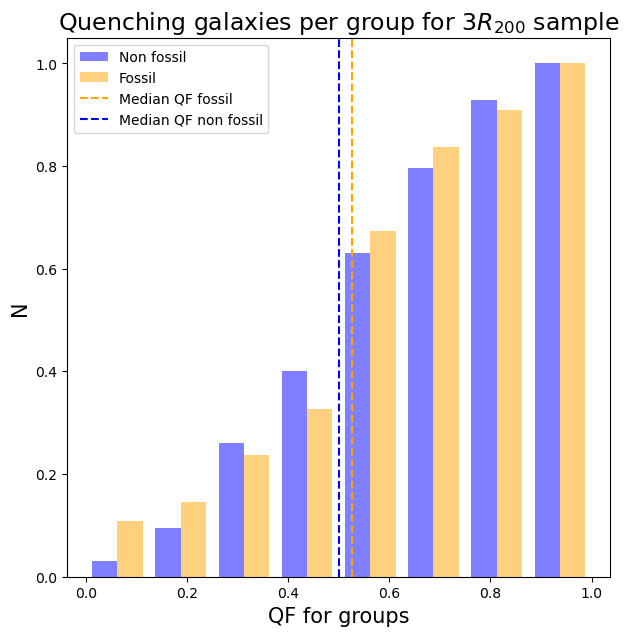

In [30]:
plt.figure(figsize=(7,7))
plt.title('Quenching galaxies per group for 3$R_{200}$ sample', fontsize=17)

plt.ylabel('N', fontsize=15)
plt.xlabel('QF for groups',fontsize=15)
plt.hist([QF_nf,QF_f], bins=bins, color = ['blue', 'orange'], rwidth=0.8, alpha=0.5, label=['Non fossil', 'Fossil'], weights = [weight_nonfossil, weight_fossil], cumulative=True)

plt.axvline(medianQF, color='orange', linestyle = '--', label='Median QF fossil')
plt.axvline(mediannQF, color='blue', linestyle = '--', label='Median QF non fossil')
plt.legend(loc='upper left', fontsize=10)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('/home/tnguser/taller/graficosnuevos/cumulativeQF3r200.jpg')

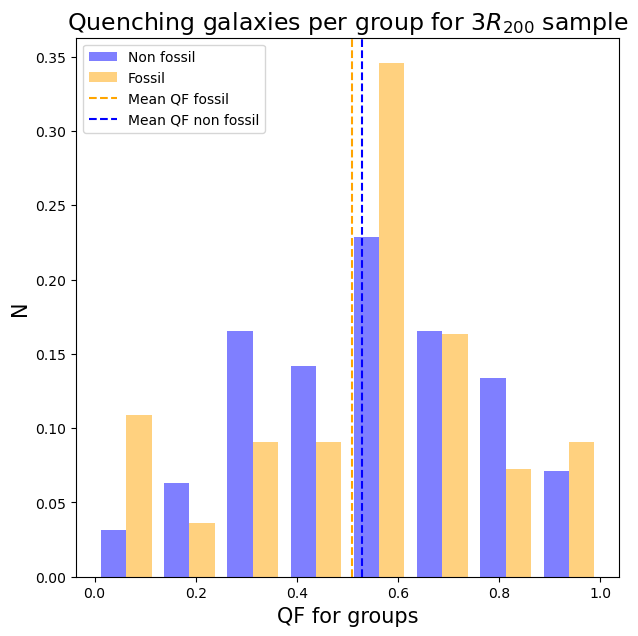

In [31]:
plt.figure(figsize=(7,7))
plt.title('Quenching galaxies per group for 3$R_{200}$ sample', fontsize=17)

plt.ylabel('N', fontsize=15)
plt.xlabel('QF for groups',fontsize=15)
plt.hist([QF_nf,QF_f], bins=bins, color = ['blue', 'orange'], rwidth=0.8, alpha=0.5, label=['Non fossil', 'Fossil'], weights = [weight_nonfossil, weight_fossil])

plt.axvline(meanQF, color='orange', linestyle = '--', label='Mean QF fossil')
plt.axvline(meannQF, color='blue', linestyle = '--', label='Mean QF non fossil')
plt.legend(loc='upper left', fontsize=10)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('/home/tnguser/taller/graficosnuevos/meanQF3r200.jpg')

In [32]:
bins1 = np.linspace(0, 1, num=len(QF_nf))
bins2 = np.linspace(0, 1, num=len(QF_f))

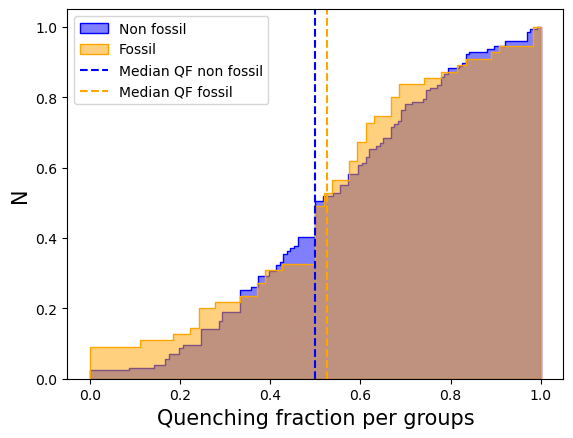

In [33]:
import seaborn as sns
# Crear un histograma con KDE
sns.histplot(QF_nf, kde=False, label='Non fossil', 
             color='blue', element='step', cumulative=True, 
             bins=bins1, stat='density', alpha=0.5)
sns.histplot(QF_f, kde=False, label='Fossil', 
             color='orange', element='step', cumulative=True, 
             bins=bins2, stat='density', alpha=0.5)

# Títulos y etiquetas
#plt.title('Quenching galaxies per group for $3R_{200}$ sample', fontsize=17)
plt.ylabel('N', fontsize=15)
plt.xlabel('Quenching fraction per groups', fontsize=15)

# Líneas verticales para medianas
medianQF_nf = np.median(QF_nf)
medianQF_f = np.median(QF_f)
plt.axvline(medianQF_nf, color='blue', linestyle='--', label='Median QF non fossil')
plt.axvline(medianQF_f, color='orange', linestyle='--', label='Median QF fossil')

# Mostrar la leyenda
plt.legend(loc='upper left', fontsize=10)

# Guardar la figura
plt.savefig('/home/tnguser/taller/graficosnuevos/QF3R200_KDE.jpg', dpi=300)

# Mostrar el gráfico
plt.show()

In [34]:
from scipy.stats import kstest
from scipy.stats import ks_2samp

In [35]:
print(ks_2samp(QF_f, QF_nf))
print(ks_2samp(QF_f, QF_nf, alternative='less'))

KstestResult(statistic=0.09377236936292055, pvalue=0.8482905000374789, statistic_location=0.6851851851851852, statistic_sign=1)
KstestResult(statistic=0.07430207587687902, pvalue=0.6167598636242771, statistic_location=0.4666666666666667, statistic_sign=-1)


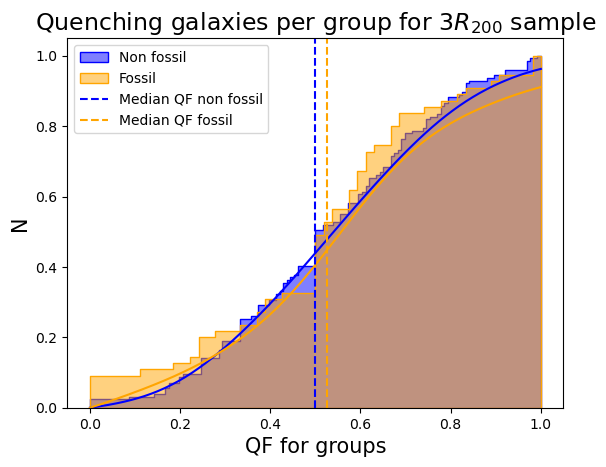

In [37]:
sns.histplot(QF_nf, kde=True, label='Non fossil', color='blue', element='step', 
             cumulative=True, bins=bins1, stat='density')
sns.histplot(QF_f, kde=True, label='Fossil', color='orange', element='step', 
             cumulative=True, bins=bins2, stat='density')


plt.title('Quenching galaxies per group for $3R_{200}$ sample', fontsize=17)
plt.ylabel('N', fontsize=15)
plt.xlabel('QF for groups', fontsize=15)

medianQF_nf = np.median(QF_nf)
medianQF_f = np.median(QF_f)
plt.axvline(medianQF_nf, color='blue', linestyle='--', label='Median QF non fossil')
plt.axvline(medianQF_f, color='orange', linestyle='--', label='Median QF fossil')

plt.legend(loc='upper left', fontsize=10)


plt.savefig('/home/tnguser/taller/graficosnuevos/QFsoft3.jpg', dpi=300)

plt.show()